In [4]:
import matplotlib.pyplot as plt
import numpy as np
import terra as t
from mpl_toolkits.basemap import Basemap
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 8

Read in the model

In [5]:
reload(t)
A = t.TerraMod('../TERRAFiles/gmt700.001.tess.all_vars.lev6.fort')

Plot Vp to make sure it looks sensible

<IPython.core.display.Javascript object>


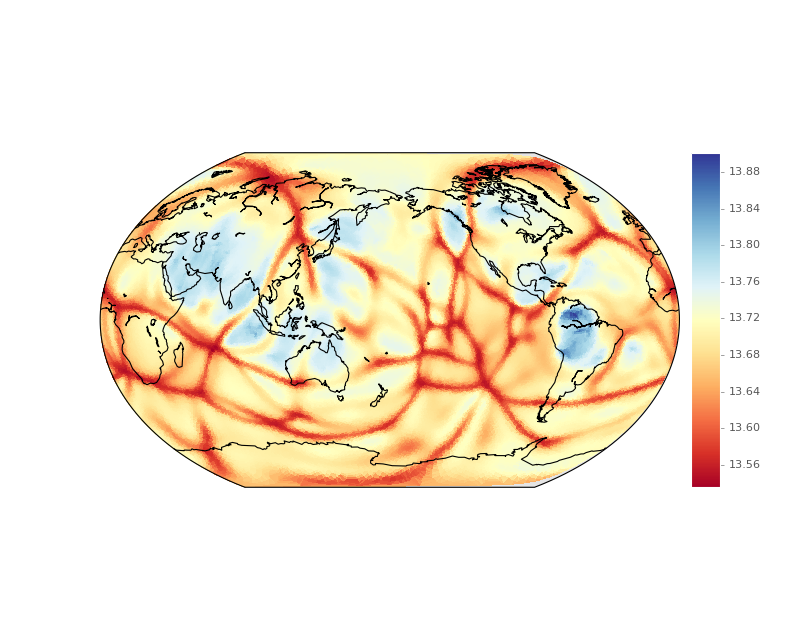

In [6]:
A.plot_vp()

Plot grid points

<IPython.core.display.Javascript object>


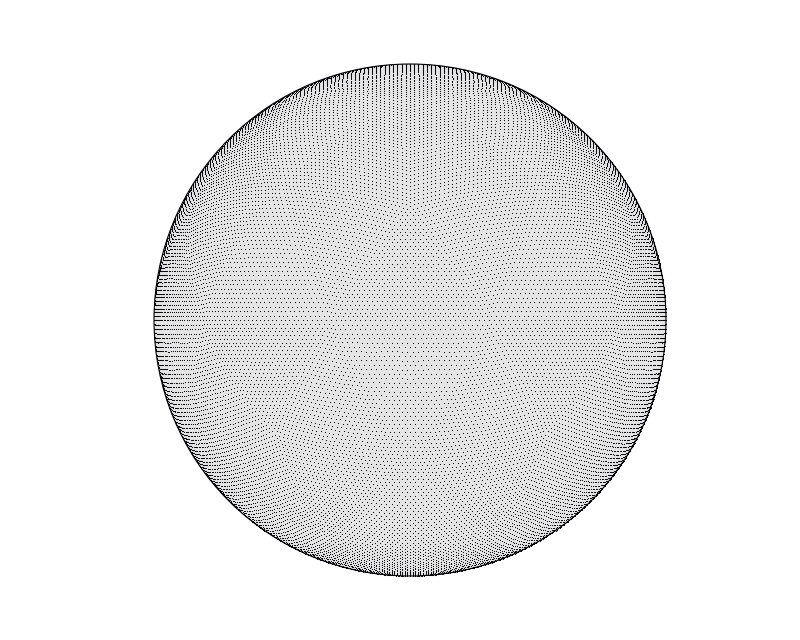

In [7]:
map = Basemap(projection='ortho',lon_0=180,lat_0=0,resolution='c')
x,y = map(A.lon,A.lat)
map.plot(x,y,'bo',markersize=0.5)
plt.show()

Consider a point surrounded by 6 other points in 2-D.  What is the gradient at the central point?

<IPython.core.display.Javascript object>


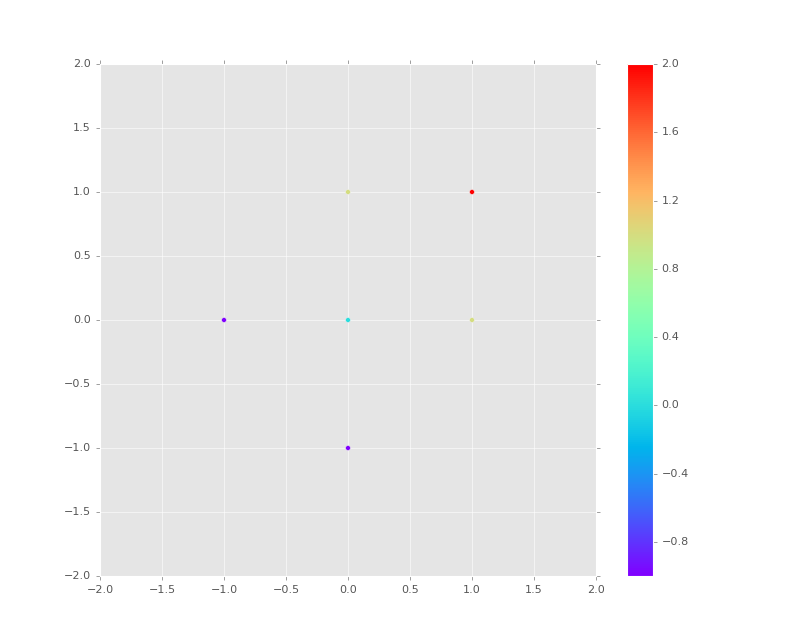

In [170]:
# start off with simplified synthetic case
pt_central=np.array([0,0])
pts_surrounding=np.array([[-1,0],[0,1],[1,0],[0,-1],[1,1],[0,0]])
#pts_surrounding=np.array([[-1,0],[0,1],[1,0],[0,-1]])
# basic function to populate values
def f(x,y):
    return x + y

# get values
val_central = f(pt_central[0],pt_central[1])
vals_surrounding = f(pts_surrounding[:,0],pts_surrounding[:,1])
#print val_central,vals_surrounding


# plot points
cm = plt.cm.get_cmap('rainbow')
# plt.plot(pt_central,'ro')
plt.scatter(pts_surrounding[:,0],pts_surrounding[:,1],c=vals_surrounding, cmap=cm)
plt.colorbar()
plt.axis([-2,2,-2,2])
plt.show()  

In [171]:
# alternatively use the points to interpolate and then calculate the gradient using the interpolated points
from scipy import interpolate
x = np.concatenate((np.array([pt_central[0]]),pts_surrounding[:,0]))
y = np.concatenate((np.array([pt_central[1]]),pts_surrounding[:,1]))
z = np.concatenate((np.array([val_central]),vals_surrounding))
func_interp = interpolate.interp2d(x,y,z)

# using the above interpolate to points either side of x and y to facilitate gradient calculation
step=0.5
fx1 = func_interp(pt_central[0]+step,pt_central[1])
fx0 = func_interp(pt_central[0]-step,pt_central[1])
fy1 = func_interp(pt_central[0],pt_central[1]+step)
fy0 = func_interp(pt_central[0],pt_central[1]-step)
grad_x = fx1-fx0/(2*step)
grad_y = fy1-fy0/(2*step)
print grad_x,grad_y

[ 1.] [ 1.]


Now need to find the nearest neighbours around each point.